# Scientific Libraries Part 1: Numpy

## Overview

Numpy is a first rate numerical package, it is of primary importance for FAST array processing. 
It manages to be faster than base python because it processes batches of array code in compiled c. You don't see this interaction, it happens in the back end, but speeds up processing by several orders of magnitude. 

Numpy is especially efficient for vectorized code. Examples or this are array operations, linear algebra and matrix calculations, generating vectors and applying fixed transformations.


## Examples of Numpy Code

## Problem 1

Consider the below polynomial from a previous set of notes:

$$p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n \tag{1}$$

We first wrote a function to solve for a value, a, and a list of coefficients.

``` p = lambda x, coeff: 
sum(a * x**i for i, a in enumerate(coeff)) ```

Rewrite this using numpy to be more efficient. 

In [32]:
import numpy as np

def p(x, coef):
    X = np.empty(len(coef))
    X[0] = 1
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    return coef @ y
  
p(1, (1,2,3))

6.0

## Problem 2

For a probability density function, create a random value x, find the point in the distribution where the probability = x and return the index. Below is a slopping formulation, rewrite it using numpy for efficiency.

In [54]:
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]
        
sample(np.array([0, 0.25, 0.5, 0.25]))

2

In [68]:
from numpy import cumsum
from numpy.random import uniform

class DiscreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))
      
d = DiscreteRV((0.1, 0.2, 0.3, 0.4))
d.draw()

array([2])

## Exercise 3

Plot the ECDF over [a,b] where a and b are method parameters.


In [0]:
import matplotlib.pyplot as plt

"""
Modifies ecdf.py from QuantEcon to add in a plot method

"""

class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower end point of the plot interval
        b : scalar(float), optional(default=None)
            Upper end point of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()

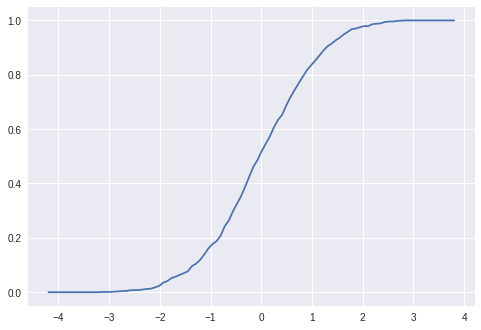

In [79]:
X = np.random.randn(1000)
F = ECDF(X)
F.plot()